<a href="https://colab.research.google.com/github/41AnkitBisht/imgroot/blob/master/IMDb_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)


2.2.0


In [3]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteEDBUPB/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteEDBUPB/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteEDBUPB/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [29]:
#LOADING DATA FROM IMDb DATASET IN TENSORFLOW
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

In [30]:
#Iterating through train_data and test_data
for string,label in train_data:
  #data is in tensor format convert it to numpy
  training_sentences.append(str(string.numpy()))
  training_labels.append(label.numpy())
  
for string,label in test_data:
  testing_sentences.append(str(string.numpy()))
  testing_labels.append(label.numpy())

In [31]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [32]:
#training and testing data have 25000 reviews and labels
print(training_labels_final.shape)
print(testing_labels_final.shape)

(25000,)
(25000,)


In [33]:
#HYPER PARAMETERS
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'

In [34]:
#CLASSIFICATION OF DATA
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#using inbuilt tokenizer to tokenize words
tokenizer = Tokenizer(num_words = vocab_size, oov_token= "<unknown>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(training_sentences)

padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [35]:
#First 100 key,val pair in dict
count =0
for x,y in word_index.items():
    if count == 100:break
    print(x,y)
    count += 1

<unknown> 1
the 2
and 3
a 4
of 5
to 6
is 7
br 8
in 9
it 10
i 11
this 12
that 13
was 14
as 15
for 16
with 17
movie 18
but 19
film 20
's 21
on 22
you 23
not 24
are 25
his 26
he 27
have 28
be 29
one 30
all 31
at 32
by 33
they 34
an 35
who 36
so 37
from 38
like 39
her 40
't 41
or 42
just 43
there 44
about 45
out 46
' 47
has 48
if 49
some 50
what 51
good 52
more 53
very 54
when 55
she 56
up 57
can 58
b 59
time 60
no 61
even 62
my 63
would 64
which 65
story 66
only 67
really 68
see 69
their 70
had 71
were 72
me 73
well 74
we 75
than 76
much 77
been 78
get 79
bad 80
will 81
people 82
do 83
also 84
other 85
into 86
because 87
great 88
first 89
him 90
how 91
most 92
made 93
its 94
then 95
way 96
make 97
them 98
could 99
too 100


In [36]:
print("Total key,val pair {total}".format(total = len(word_index) ))

Total key,val pair 86539


In [37]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '>') for i in text])

In [38]:
print(padded[1])

[   0    0    0    0    0    0    0  256   28   78  585    6  815 2383
  317  109   19   12    7  643  696    6    4 2249    5  183  599   68
 1483  114 2289    3 4005   22    2    1    3  263   43 4754    4  173
  190   22   12 4126   11 1604 2383   87    2   20   14 1945    2  115
  950   14 1838 1367  563    3  365  183  477    6  602   19   17   61
 1845    5   51   14 4090   98   42  138   11  983   11  200   28 1059
  171    5    2   20   19   11  298    2 2182    5   10    3  285   43
  477    6  602    5   94  203    1  206  102  148 4450   16  228  336
   11 2510  392   12   20   32   31   47]


In [39]:
#while decoding replacing values with words 
print(decode_review(padded[1]))
print(training_sentences[1])
#check diff in both sentences
#sette is not found in dict so replaced with <unknown>

> > > > > > > b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <unknown> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <unknown> without any real concern for anything else i cant recommend this film at all '
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explana

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                9600      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [41]:
#TRAINING MODEL
num_epochs = 20
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/20
782/782 [==============================] - 16s 20ms/step - loss: 0.5296 - accuracy: 0.7095 - val_loss: 0.3673 - val_accuracy: 0.8407
Epoch 2/20
782/782 [==============================] - 16s 20ms/step - loss: 0.3148 - accuracy: 0.8720 - val_loss: 0.3563 - val_accuracy: 0.8449
Epoch 3/20
782/782 [==============================] - 16s 20ms/step - loss: 0.2485 - accuracy: 0.9051 - val_loss: 0.3598 - val_accuracy: 0.8430
Epoch 4/20
782/782 [==============================] - 15s 19ms/step - loss: 0.1977 - accuracy: 0.9279 - val_loss: 0.4461 - val_accuracy: 0.8167
Epoch 5/20
782/782 [==============================] - 15s 19ms/step - loss: 0.1524 - accuracy: 0.9467 - val_loss: 0.4467 - val_accuracy: 0.8336
Epoch 6/20
782/782 [==============================] - 15s 19ms/step - loss: 0.1034 - accuracy: 0.9664 - val_loss: 0.5009 - val_accuracy: 0.8312
Epoch 7/20
782/782 [==============================] - 15s 20ms/step - loss: 0.0678 - accuracy: 0.9791 - val_loss: 0.6006 - val_accuracy:

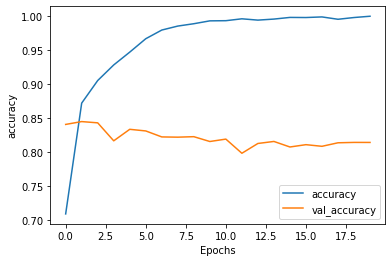

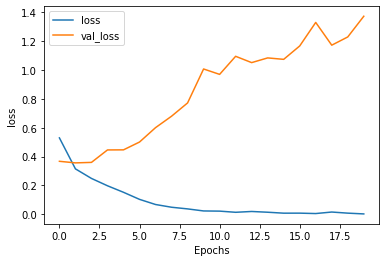

In [53]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [54]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


In [55]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [56]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>